## 1 - Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2 - Load dataset

In [2]:
data = pd.read_csv("/kaggle/input/student-performance-predictions/student_performance.csv")

In [3]:
data.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [4]:
data.shape

(10, 9)

In [5]:
data.StudyHoursPerWeek

0    15
1    20
2    10
3    25
4    18
5    30
6     8
7    17
8    12
9    22
Name: StudyHoursPerWeek, dtype: int64

In [6]:
data.FinalGrade

0    80
1    87
2    68
3    92
4    85
5    90
6    62
7    78
8    72
9    88
Name: FinalGrade, dtype: int64

## 3 - Visualizing the data 

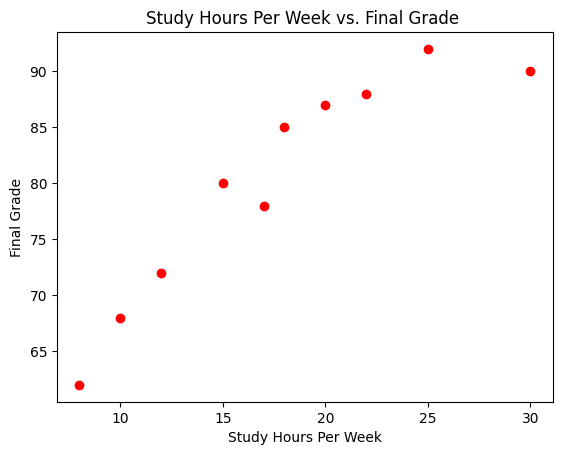

In [7]:
plt.scatter(data.StudyHoursPerWeek , data.FinalGrade , color = 'red')
plt.title("Study Hours Per Week vs. Final Grade ")
plt.xlabel("Study Hours Per Week")
plt.ylabel("Final Grade")
plt.show()

## 4 - Loss Function 

In [8]:
def loss_function(m , b, points):
    total_error = 0 
    for i in range(len(points)):
        x = points.iloc[i]["StudyHoursPerWeek"]
        y = points.iloc[i]["FinalGrade"]
        total_error += (y - (m * x + b)) ** 2
    total_error / float(len(points))

## 5 - Gradient descent

In [9]:
def gradient_descent(m_now , b_now , points , learning_rate) : 
    
    # set initial values 
    m_gradient = 0 
    b_gradient = 0 
    n = len(points)
    
    for i in range(n):
        # X features and Y target
        x = points.iloc[i]["StudyHoursPerWeek"]
        y = points.iloc[i]["FinalGrade"]
        
        # derivatives 
        m_gradient += -(2/n) * (y - (m_now * x + b_now)) * x 
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
        
    # new weigths 
    m = m_now - learning_rate * m_gradient
    b = b_now - learning_rate * b_gradient
    
    return m , b

## 6 - Calculate Weigths ( m , b )

In [10]:
m = 0 
b = 0 
learning_rate = 0.002 
epochs = 10000  

for i in range(epochs):
    m , b = gradient_descent(m , b, data, learning_rate)

In [11]:
print(f"m = {m}")
print(f"b = {b}")

m = 1.3903500966337135
b = 55.532961665809395


## 7 - Visualizing the model with data 

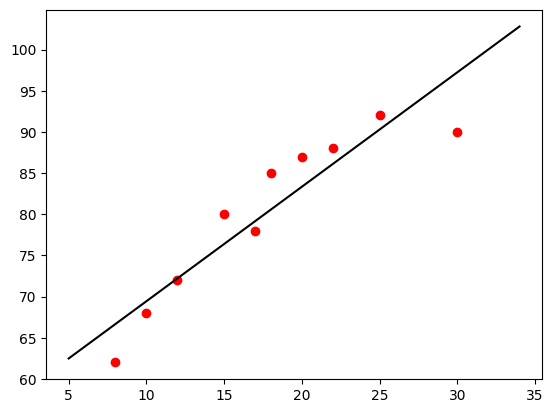

In [12]:
plt.scatter(data.StudyHoursPerWeek , data.FinalGrade , color = 'red')
plt.plot(list(range(5,35)) , [m * x + b for x in   range(5,35)] , color = "black")
plt.show()